# Publication Analysis 

About publication in general



In [1]:
import pandas as pd
import datetime
import time
import sys
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
date='20190827'
zenododata=pd.read_pickle("processed_data/" + date + "/zenododata2.pkl",compression='gzip')

In [3]:
zenododata.columns

Index(['category', 'date', 'title', 'authors', 'abstract', 'keywords',
       'license', 'url', 'files'],
      dtype='object')

## Category

## Global

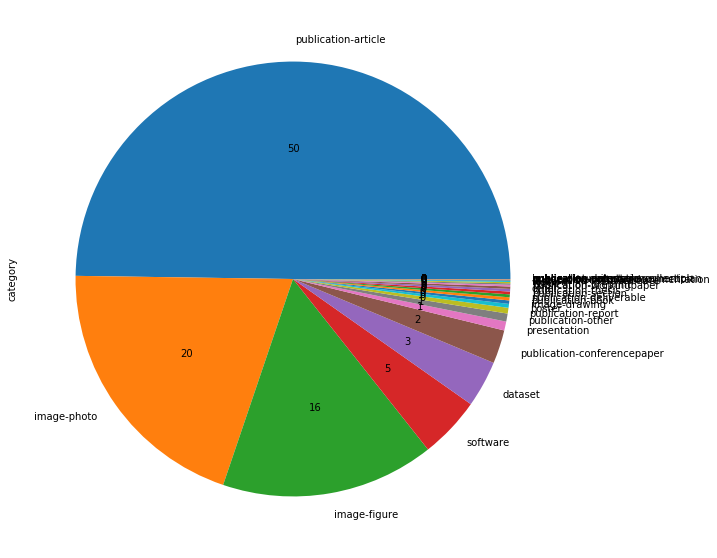

In [14]:
zenododata.category.value_counts().plot.pie(figsize=(10, 10),autopct='%.0f', fontsize=10)

In [15]:
zenododata.category.value_counts()

publication-article                  679696
image-photo                          273503
image-figure                         216664
software                              62527
dataset                               47245
publication-conferencepaper           34108
presentation                           9074
publication-other                      8133
publication-report                     5816
poster                                 3976
image-drawing                          3452
publication-book                       3139
publication-deliverable                2982
publication-section                    2812
publication-thesis                     2644
other                                  2430
publication-workingpaper               1696
publication-preprint                   1486
video                                  1325
lesson                                 1045
publication-technicalnote               689
image-other                             541
publication-softwaredocumentatio

## Per year

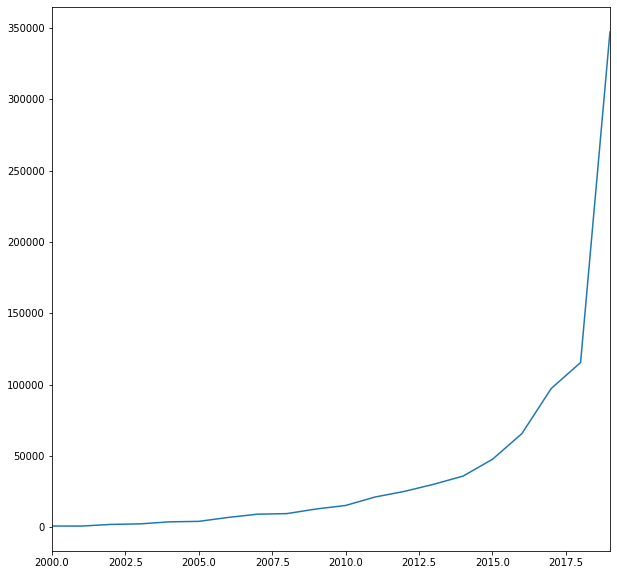

In [194]:
zenododata.year.value_counts().sort_index().truncate(2000,2019).plot(figsize=(10,10))


### Top Category evolution per year

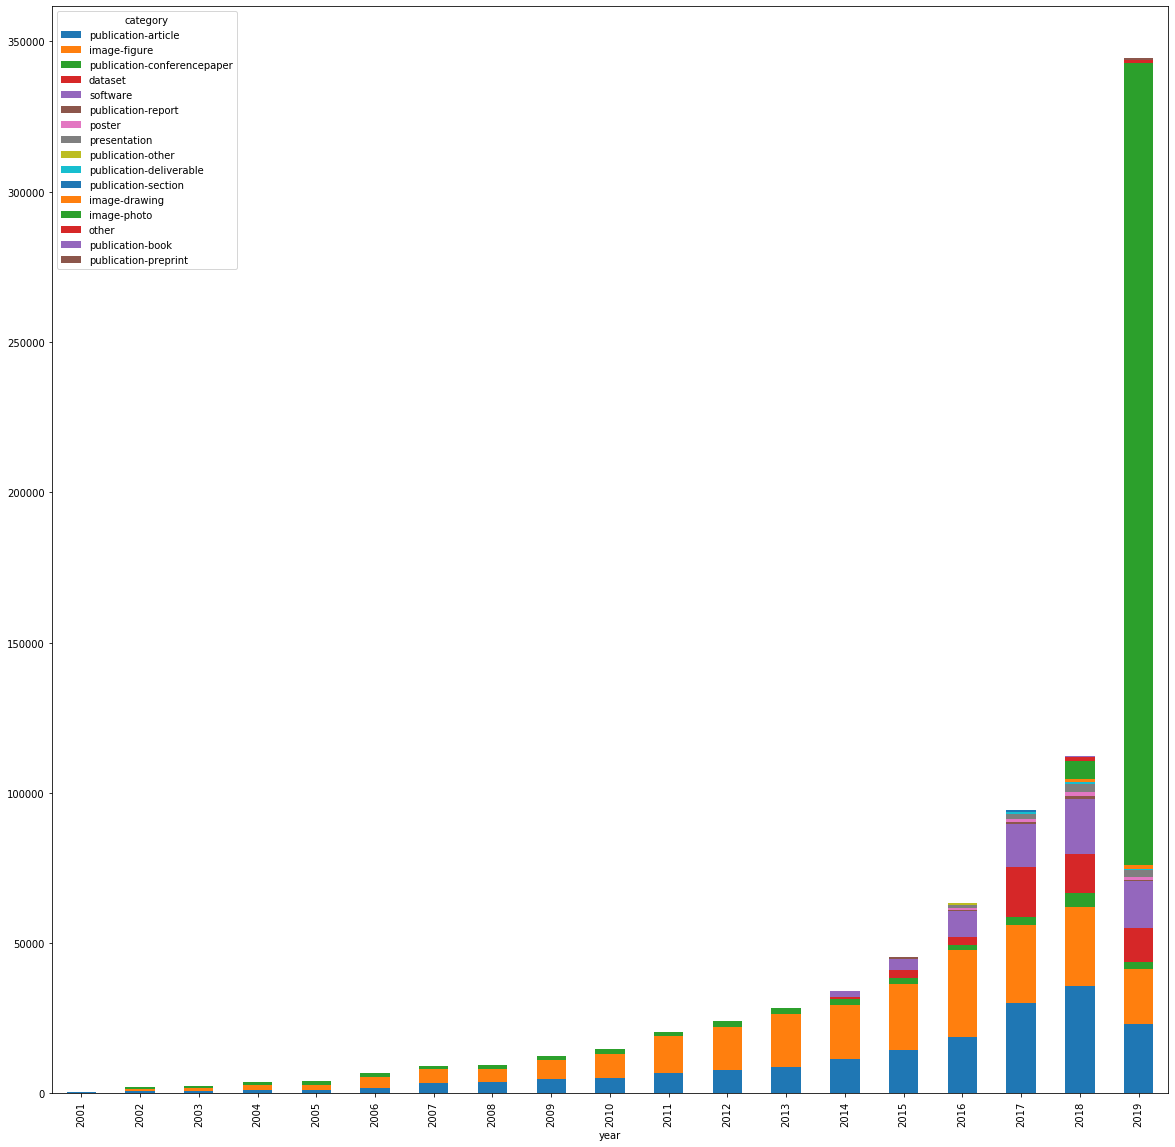

In [19]:
t=zenododata[zenododata.year>2000].groupby(['year','category'])
t.size()[t.size()>500].unstack().plot.bar(figsize=(20,20),stacked=True)

### Dataset and software evolution per year

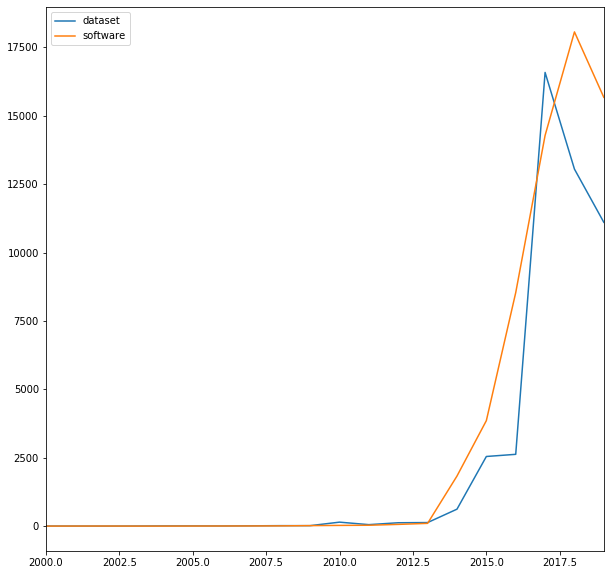

In [216]:
ax=zenododata[zenododata.category=='dataset'].year.value_counts().sort_index().truncate(2000,2019).plot(label='dataset',figsize=(10,10))
zenododata[zenododata.category=='software'].year.value_counts().sort_index().truncate(2000,2019).plot(label='software',figsize=(10,10),ax=ax)
ax.legend(loc='best')
plt.show()

## KeyWords
### Global

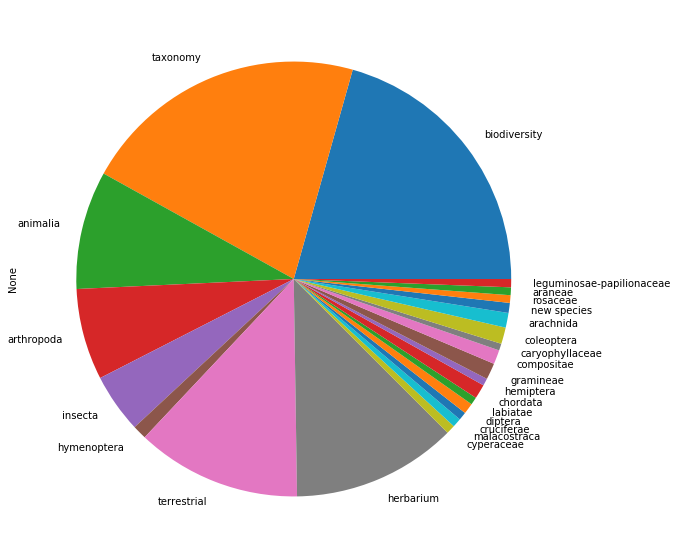

In [35]:
freq = {} 
for keys in zenododata.keywords:
    for item in keys:
        item=item.lower()
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1



keywords=pd.Series(freq)


keywords[keywords>10000].plot.pie(figsize=(10,10))

### KeyWords for dataset

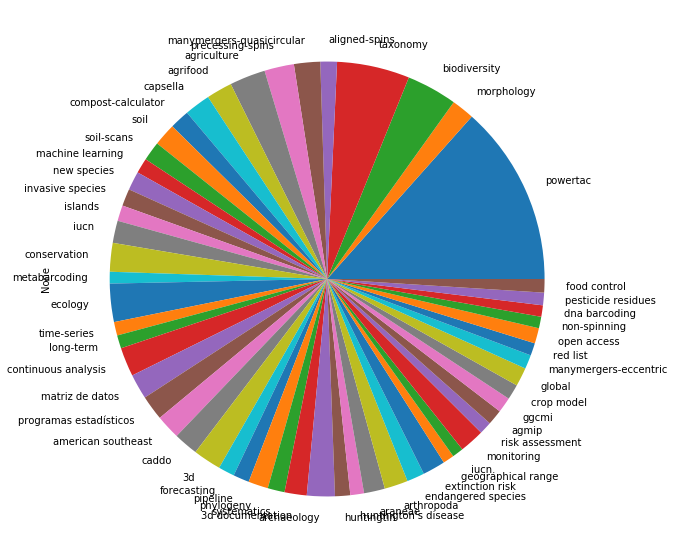

In [38]:
freq = {} 
for keys in zenododata[zenododata.category=='dataset'].keywords:
    for item in keys:
        item=item.lower()
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1



keywords=pd.Series(freq)


keywords[keywords>100].plot.pie(figsize=(10,10))

### KeyWords for software

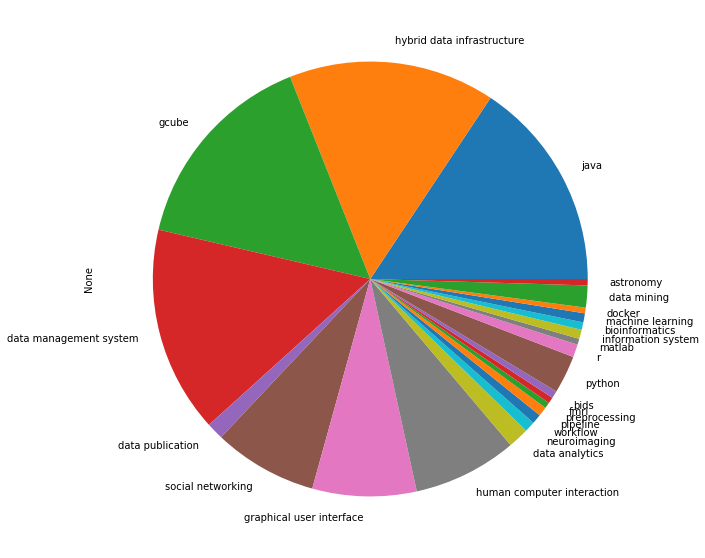

In [39]:
freq = {} 
for keys in zenododata[zenododata.category=='software'].keywords:
    for item in keys:
        item=item.lower()
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1



keywords=pd.Series(freq)


keywords[keywords>100].plot.pie(figsize=(10,10))

## Licenses
* AGPL, GPL, LGPL are considered GPL (all version too)
* CC are also version independant 

In [88]:
def changelic(txtlic):
    change={
        '/zero/':'CC0',
        '/by-sa/':'CC-BY-SA',
        '/by':'CC-BY',
        '/by-nc-nd/':'CC-BY-NC-ND',
        '/by-nc/':'CC-BY-NC',
        '/by-nc-sa/':'CC-BY-NC-SA',
        '/EUP-1.1':'EUP',
        '/MIT':'MIT',
        '/GPL-3.0':'GPL',
        '/GPL-2.0':'GPL',
        '/LGPL-3.0':'GPL',
        '/LGPL-2.1':'GPL',
        '/AGPL-3.0':'GPL',
        '/Apache-2.0':'Apache',
        '/BSD-3-Clause':'BSD',
        '/afl-3.0':'AFL',
        'None':'None'
    }
    for url,txt in change.items():
        if url in txtlic :
            return txt
    return "Others"


###  Global

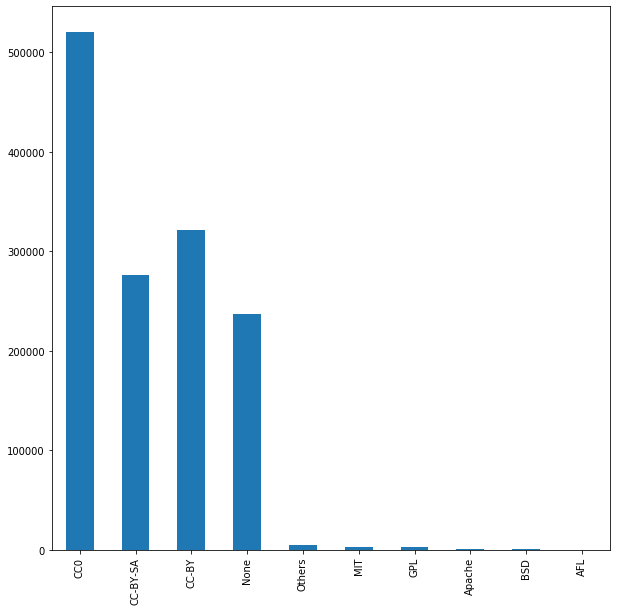

In [91]:
lic=zenododata.license.value_counts()

lic.index=lic.index.map(changelic)
lic.sum(level=0).plot.bar(figsize=(10,10))

### Dataset

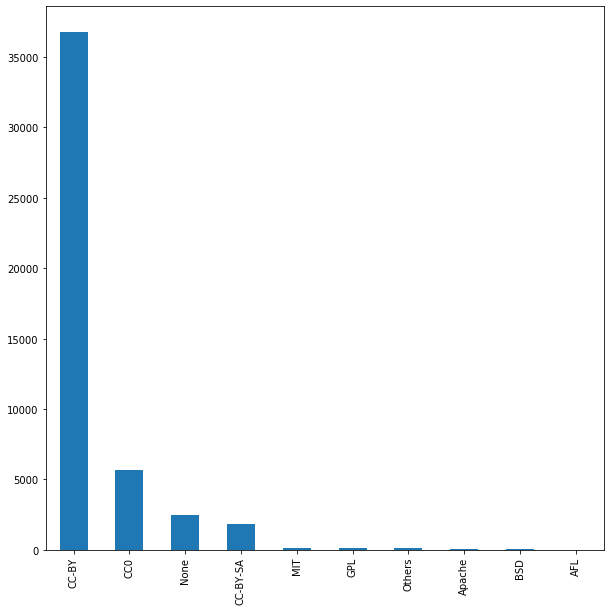

In [97]:
lic=zenododata[zenododata.category=='dataset'].license.value_counts()

lic.index=lic.index.map(changelic)
lic.sum(level=0).plot.bar(figsize=(10,10))

### Software

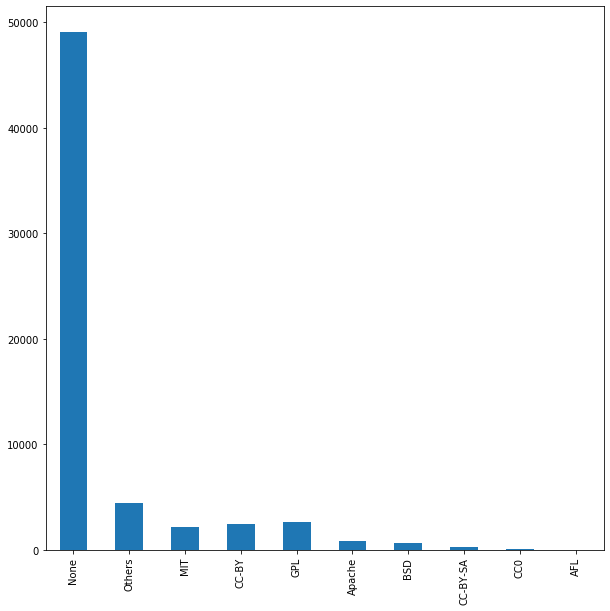

In [93]:
lic=zenododata[zenododata.category=='software'].license.value_counts()

lic.index=lic.index.map(changelic)
lic.sum(level=0).plot.bar(figsize=(10,10))

### No License evolution per year

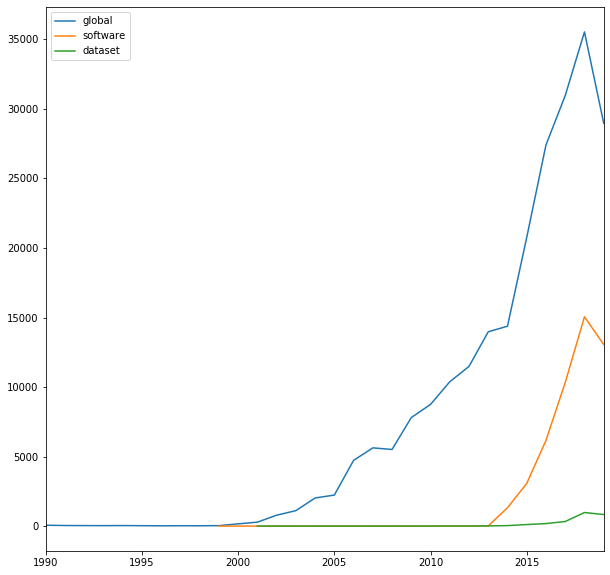

In [220]:
ax=zenododata[zenododata.license=='None'].year.value_counts().sort_index().truncate(1990,2019).plot(figsize=(10,10),label='global')
zenododata[(zenododata.license=='None') & (zenododata.category=='software')].year.value_counts().sort_index().truncate(1990,2019).plot(figsize=(10,10),label='software',ax=ax)
zenododata[(zenododata.license=='None') & (zenododata.category=='dataset')].year.value_counts().sort_index().truncate(1990,2019).plot(figsize=(10,10),label='dataset',ax=ax)
ax.legend(loc='best')
plt.show()


## No License per category

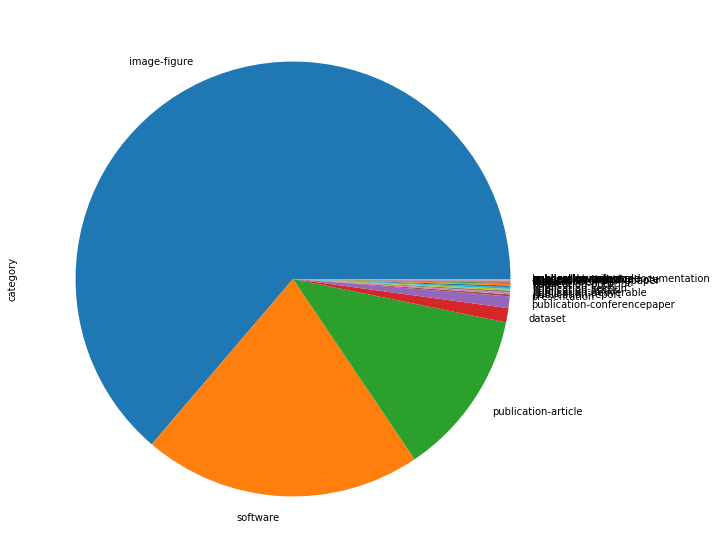

In [105]:
zenododata[zenododata.license=='None'].category.value_counts().plot.pie(figsize=(10,10))

## Abstract

### No abstract

In [112]:
len(zenododata[zenododata.abstract=="None"])

470

### Lenght of abstract

In [130]:
zenododata=zenododata.drop('abstract_nw',axis=1)
zenododata['abstract_nw']=zenododata.apply(lambda x: len(x['abstract'].split()),axis=1)

In [131]:
zenododata

,category,date,title,authors,abstract,keywords,license,url,files,year,abstract_nw
0,image-figure,2018-01-30,"FIGURES24–28. Anaphes quinquearticulatus, para...","[Huber, John T., Thuróczy, Csaba]","FIGURES24–28. Anaphes quinquearticulatus, para...","[Biodiversity, Taxonomy, Animalia, Arthropoda,...",None,https://zenodo.org/record/1162547,NaN,2018,34
1,publication-article,1863-01-01,Ueber das specifische Gewicht und das electris...,"[de Rive, L. la, Matthiefsen, A., Vogt, C.]",n/a,[],http://creativecommons.org/publicdomain/zero/1...,https://zenodo.org/record/2209787,NaN,1863,1
2,image-photo,2019-05-18,Iris pseudacorus L. (BR0000011362227),[Meise Botanic Garden],Belgium Herbarium image of Meise Botanic Garden.,"[Biodiversity, Taxonomy, Terrestrial, Herbariu...",http://creativecommons.org/licenses/by-sa/4.0/...,https://zenodo.org/record/2945343,NaN,2019,7
3,dataset,2017-03-03,InSAR 2015 Nepal EQ Sentinel 1 ESA,[Antoine Lucas],InSAR for the 215 Nepal EQ using Sentinel 1 Da...,"[InSAR, Sentinel-1, Nepal, 2015 EQ]",http://creativecommons.org/licenses/by/4.0/leg...,https://zenodo.org/record/345302,NaN,2017,15
4,publication-article,2015-09-17,Biomonitoring And Zonal Cartography Of Loxodon...,[Koto-te-Nyiwa Ngbolua],The Democratic Republic of the Congo is a biod...,"[Democratic Republic of the Congo, Mai Ndombe ...",http://creativecommons.org/licenses/by/4.0/leg...,https://zenodo.org/record/893571,NaN,2015,240
...,...,...,...,...,...,...,...,...,...,...,...
1395372,image-photo,2019-05-22,Taraxacum alatum H.Lindb. (BR0000011786139),[Meise Botanic Garden],Belgium Herbarium image of Meise Botanic Garden.,"[Biodiversity, Taxonomy, Terrestrial, Herbariu...",http://creativecommons.org/licenses/by-sa/4.0/...,https://zenodo.org/record/3168804,NaN,2019,7
1395373,image-figure,2019-04-30,"Figure 22 from: Albano PG, Bakker PAJ, Sabelli...","[Albano, Paolo G., Bakker, Piet A. J., Sabelli...","Figure 22 Triphoriscarteretensis Hinds, 1843, ...","[Atlantic Ocean, Caribbean, Eastern Pacific, I...",http://creativecommons.org/licenses/by/4.0/leg...,https://zenodo.org/record/2654085,NaN,2019,46
1395374,publication-article,1922-11-01,Weitere Ergebnisse der Spaltlampenmikroskopie ...,"[Vogt, Alfred]",n/a,[],http://creativecommons.org/publicdomain/zero/1...,https://zenodo.org/record/2287982,NaN,1922,1
1395375,image-photo,2019-05-11,Bidens tripartita Bigelow (BR0000011678717),[Meise Botanic Garden],Belgium Herbarium image of Meise Botanic Garden.,"[Biodiversity, Taxonomy, Terrestrial, Herbariu...",http://creativecommons.org/licenses/by-sa/4.0/...,https://zenodo.org/record/2728864,NaN,2019,7


### Global

7.0  +-  111.88744567333579


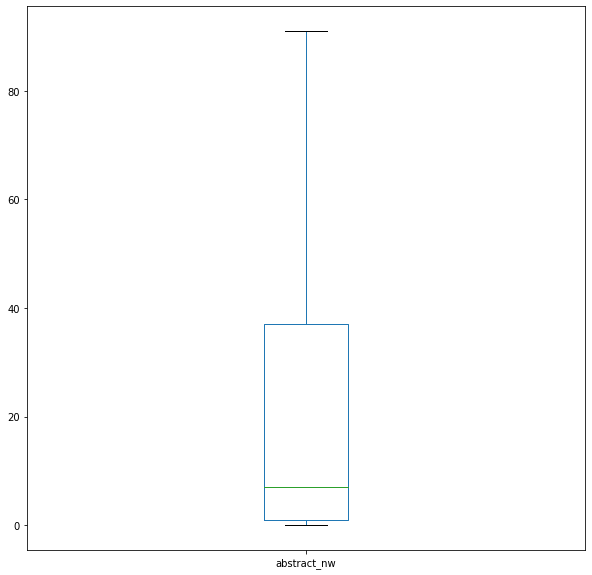

In [163]:
zenododata.abstract_nw.plot.box(figsize=(10,10),showfliers=False)
print(zenododata.abstract_nw.median()," +- ", zenododata.abstract_nw.std())

In [165]:
print(zenododata.abstract[zenododata.abstract_nw>30000])

247866    Gozhenko A.I., Korshnyak V.A., Nasibullin B.A....
560129    Dolomatov S.I., Zukow W. Эпигенетика почек = K...
Name: abstract, dtype: object


In [170]:
zenododata[.groupby('year').median()

,abstract_nw
year,
195,1.0
1000,2.0
1056,19.0
1073,9.0
1250,11.0
...,...
2085,4.0
2088,1.0
2104,3.0


### Dataset
#### global

66.0  +-  185.48731610131793


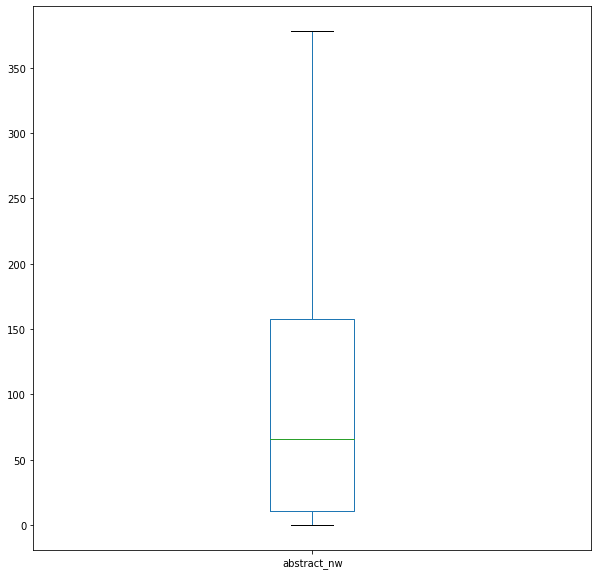

In [202]:
zenododata[zenododata.category=='dataset'].abstract_nw.plot.box(figsize=(10,10),showfliers=False)
print(zenododata[zenododata.category=='dataset'].abstract_nw.median()," +- ", zenododata[zenododata.category=='dataset'].abstract_nw.std())

#### Per Year

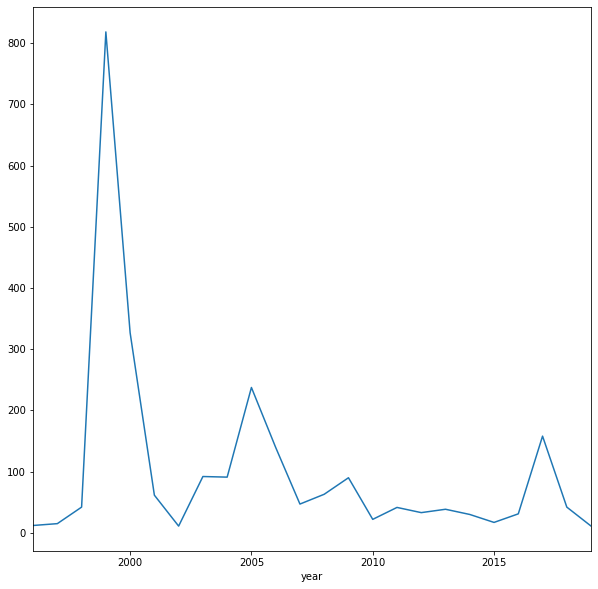

In [208]:
yerr=zenododata[(zenododata.year>1990) & (zenododata.year<=2019) & (zenododata.category=='dataset')].groupby('year').abstract_nw.std()
zenododata[(zenododata.year>1990) & (zenododata.year<=2019) & (zenododata.category=='dataset')].groupby('year').abstract_nw.median().plot(figsize=(10,10))

### Software
#### Global

16.0  +-  145.63319264270183


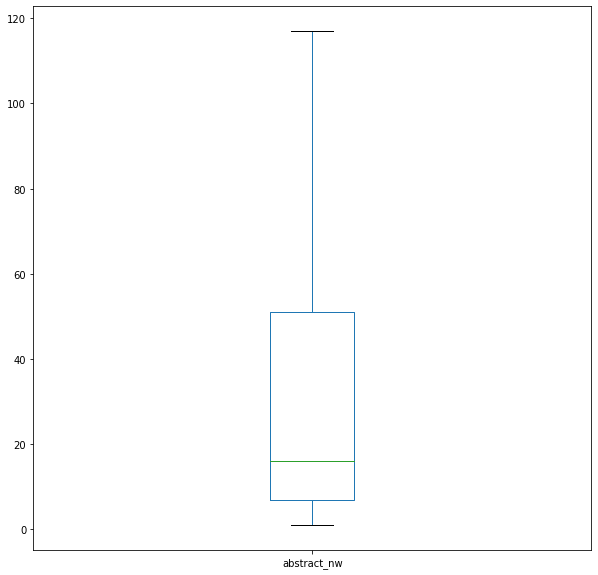

In [209]:
zenododata[zenododata.category=='software'].abstract_nw.plot.box(figsize=(10,10),showfliers=False)
print(zenododata[zenododata.category=='software'].abstract_nw.median()," +- ", zenododata[zenododata.category=='software'].abstract_nw.std())

#### Per Year

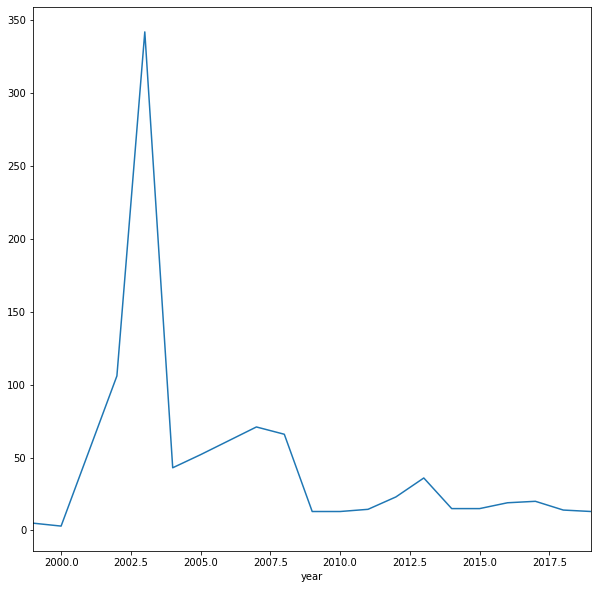

In [210]:
yerr=zenododata[(zenododata.year>1990) & (zenododata.year<=2019) & (zenododata.category=='software')].groupby('year').abstract_nw.std()
zenododata[(zenododata.year>1990) & (zenododata.year<=2019) & (zenododata.category=='software')].groupby('year').abstract_nw.median().plot(figsize=(10,10))

In [221]:
freq = {} 
for keys in zenododata.authors:
    for item in keys:
        item=item.lower()
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1



authors=pd.Series(freq)


3.817961738061479  +-  324.6470617864966


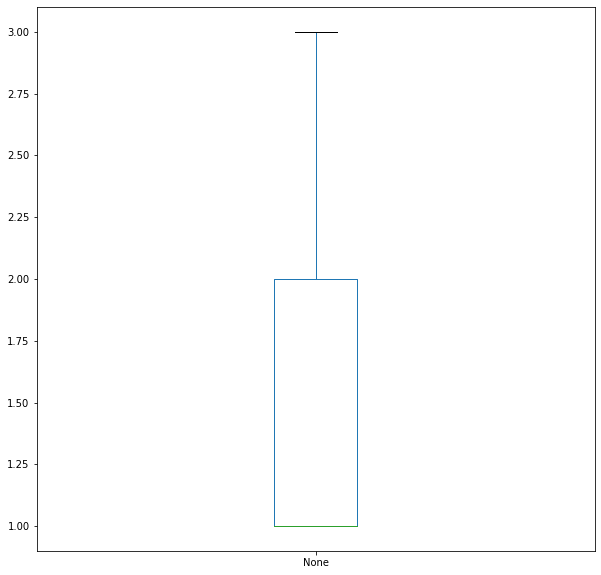

In [237]:
authors.plot.box(figsize=(10,10),showfliers=False)
print(authors.mean()," +- ",authors.std())